In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('PPOC Project Data.xlsx', 'Normalised')
print(df)

    Year  Gini Index  Government expenditure on education, total (% of GDP)  \
0   2000    1.211551                                          -1.574965       
1   2001    2.394383                                           0.049543       
2   2002    1.791316                                          -0.516958       
3   2003    0.660753                                           0.612344       
4   2004   -0.003876                                          -1.912311       
5   2005    0.542679                                          -0.409179       
6   2006   -0.095662                                          -0.460998       
7   2007   -0.652157                                          -0.900538       
8   2008   -0.207173                                           0.157205       
9   2009   -0.171774                                           2.107254       
10  2010   -0.656580                                           0.663659       
11  2011   -0.809928                                

In [ ]:
y = df['Gini Index']
print(y)

0     1.211551
1     2.394383
2     1.791316
3     0.660753
4    -0.003876
5     0.542679
6    -0.095662
7    -0.652157
8    -0.207173
9    -0.171774
10   -0.656580
11   -0.809928
12   -0.738137
13   -0.696574
14   -0.634579
15   -0.527381
16   -0.783328
17   -0.911693
18   -1.094466
19    1.382627
Name: Gini Index, dtype: float64


In [ ]:
X = df[['Government expenditure on education, total (% of GDP)', 'Government expenditure on education, total (% of government expenditure)', 'Literacy rate', 'Primary', 'Lower Secondary', 'Upper Secondary', 'Tertiary']]
print(X)

    Government expenditure on education, total (% of GDP)  \
0                                           -1.574965       
1                                            0.049543       
2                                           -0.516958       
3                                            0.612344       
4                                           -1.912311       
5                                           -0.409179       
6                                           -0.460998       
7                                           -0.900538       
8                                            0.157205       
9                                            2.107254       
10                                           0.663659       
11                                           0.473185       
12                                          -0.351726       
13                                           0.648817       
14                                           0.881987       
15                      

In [ ]:
import statsmodels.api as sm

In [ ]:
lm = sm.OLS(y, X)
results = lm.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Gini Index   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              22.39
Date:                Fri, 08 Jul 2022   Prob (F-statistic):                    2.74e-06
Time:                        17:08:12   Log-Likelihood:                         -2.1715
No. Observations:                  20   AIC:                                      18.34
Df Residuals:                      13   BIC:                                      25.31
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                                                               coef    std err          t      P>|t|    

As we see that the model is more dependent on the upper secondary factor, we use this variable to apply polynomial regression model of degree 2 on this data.

In [ ]:
X = df['Upper Secondary']
print(X)

0    -0.778992
1    -1.440864
2    -2.397847
3    -0.984951
4    -0.833050
5    -0.147142
6    -1.047097
7    -0.234583
8    -0.340885
9     0.453713
10    0.522627
11    0.612645
12    0.098021
13    0.750514
14    0.583500
15    1.121882
16    1.366338
17    1.017657
18    0.040350
19    1.638165
Name: Upper Secondary, dtype: float64


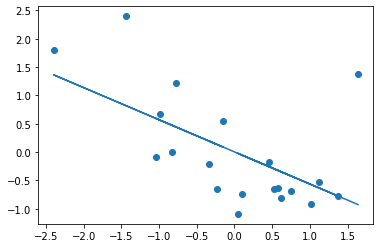

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
ypred = model.predict(X) 

import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X,ypred)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
polynomial_features= PolynomialFeatures(degree=2)
x = X.to_numpy() 
xp = polynomial_features.fit_transform(x.reshape((-1,1)))
xp.shape

(20, 3)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(20,)

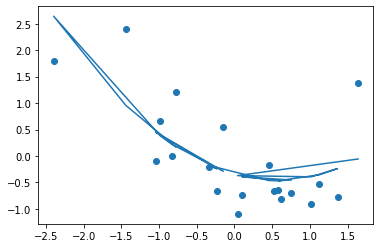

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypred)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gini Index   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     9.854
Date:                Fri, 08 Jul 2022   Prob (F-statistic):            0.00144
Time:                        17:28:31   Log-Likelihood:                -20.168
No. Observations:                  20   AIC:                             46.34
Df Residuals:                      17   BIC:                             49.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3548      0.208     -1.707      0.106      -0.793       0.084
x1            -0.3989      0.173     -2.312      0.034      -0.763      -0.035
x2             0.3548      0.132      2.697      0.015       0.077       0.632
==============================================================================
Omnibus:                        4.801   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.575
Skew:                           1.035   Prob(JB):                        0.167
Kurtosis:                       2.928   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""